In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('weather.csv',index_col=[0],parse_dates=True, squeeze=True)

In [3]:
df.shape

(25551, 4)

In [4]:
df.head()

,PRCP(liquid or ice rain from sky),TMAX,TMIN,RAIN
DATE,,,,
1948-01-01,0.47,51,42,True
1948-01-02,0.59,45,36,True
1948-01-03,0.42,45,35,True
1948-01-04,0.31,45,34,True
1948-01-05,0.17,45,32,True


In [5]:
df.drop(['RAIN'],axis=1,inplace=True)

In [18]:
df['year']=df.index.year
df['month']=df.index.month
df.head()

,PRCP(liquid or ice rain from sky),TMAX,TMIN,year,month
DATE,,,,,
1948-01-01,0.47,51,42,1948,1
1948-01-02,0.59,45,36,1948,1
1948-01-03,0.42,45,35,1948,1
1948-01-04,0.31,45,34,1948,1
1948-01-05,0.17,45,32,1948,1


In [7]:
df.isnull().sum().sort_values(ascending=False)

PRCP(liquid or ice rain from sky)    3
month                                0
year                                 0
TMIN                                 0
TMAX                                 0
dtype: int64

In [8]:
df['PRCP(liquid or ice rain from sky)']=df['PRCP(liquid or ice rain from sky)'].fillna(method='ffill')

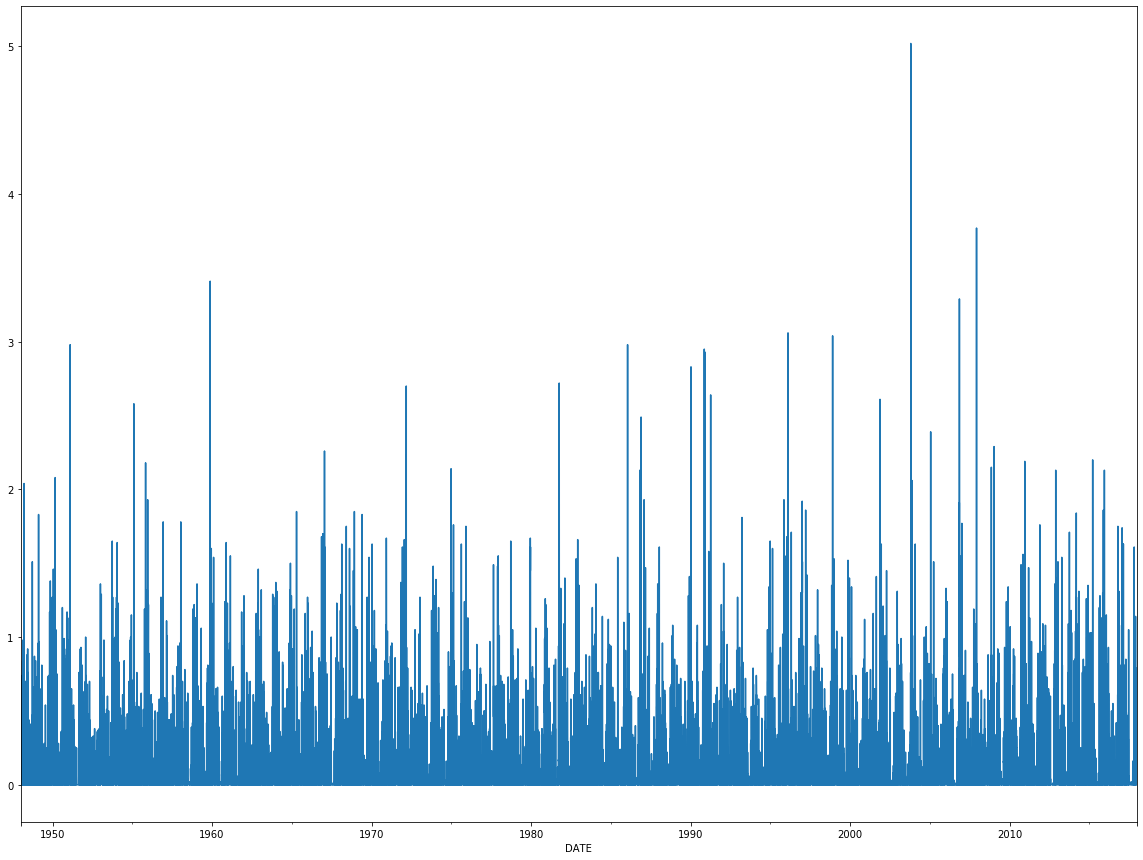

In [9]:
plt.figure(figsize=(20,15))
df['PRCP(liquid or ice rain from sky)'].plot()

In [10]:
df_PRCP_mean=df['PRCP(liquid or ice rain from sky)'].rolling(window=200).mean()

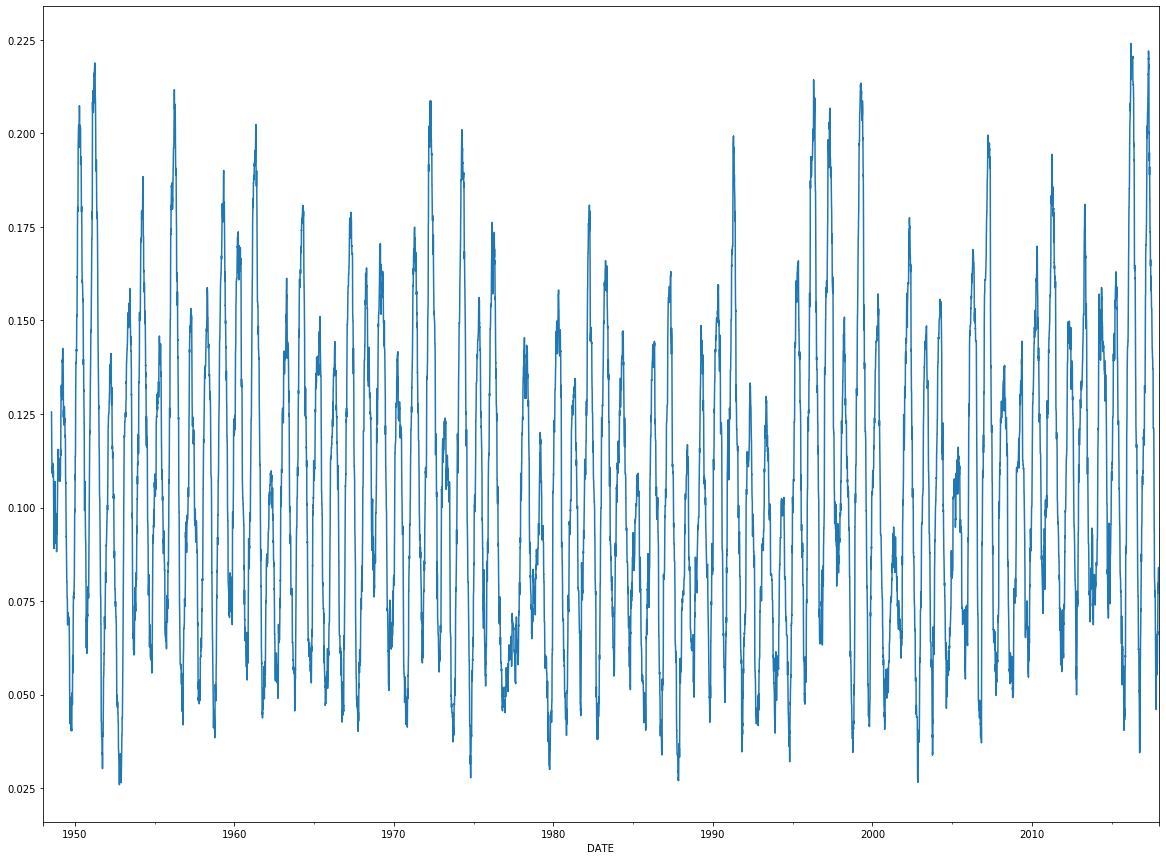

In [11]:
plt.figure(figsize=(20,15))
df_PRCP_mean.plot()

In [23]:
df_1950=df[df['year']==1950]
df_1980=df[df['year']==1980]

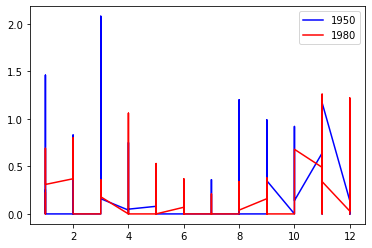

In [25]:
plt.plot(df_1950['month'],df_1950['PRCP(liquid or ice rain from sky)'],label=1950,color='blue')
plt.plot(df_1980['month'],df_1980['PRCP(liquid or ice rain from sky)'],label=1980,color='red')
plt.legend(loc='best')

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['PRCP(liquid or ice rain from sky)'])